In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_pickle("segmented_dataset.pkl")

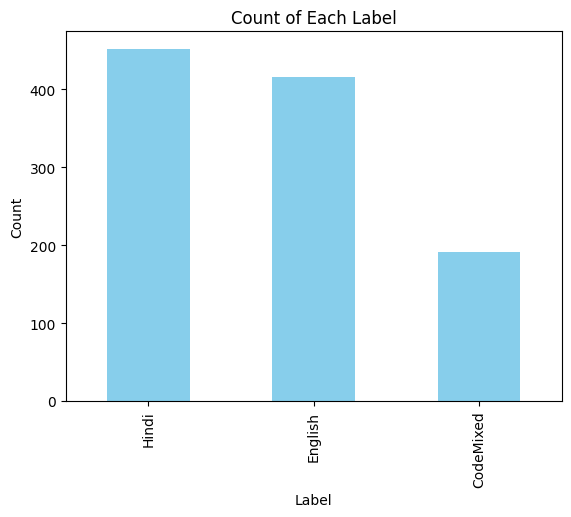

In [3]:
label_counts = dataset['label'].value_counts()

label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.show()

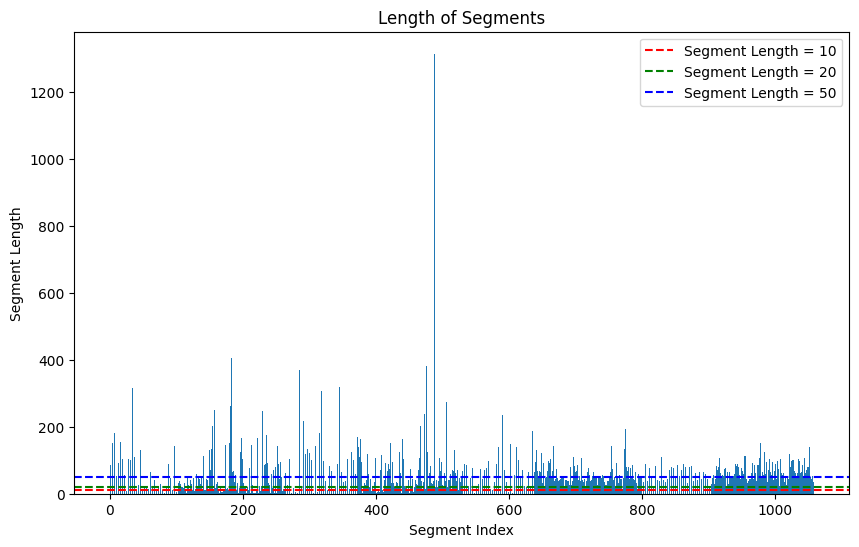

In [4]:
import matplotlib.pyplot as plt

segment_lengths = [len(segment) for segment in dataset["segment_list"]]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(segment_lengths)), segment_lengths)
plt.xlabel("Segment Index")
plt.ylabel("Segment Length")
plt.title("Length of Segments")

plt.axhline(y=10, color='r', linestyle='--', label='Segment Length = 10')
plt.axhline(y=20, color='g', linestyle='--', label='Segment Length = 20')
plt.axhline(y=50, color='b', linestyle='--', label='Segment Length = 50')

# Show legend
plt.legend()
plt.show()

In [5]:
filtered_segments = []

for segment in dataset["segment_list"]:
    if len(segment) > 20:
        filtered_segments.append(segment[:20])
    else:
        filtered_segments.append(segment)

dataset['filtered_segment'] = filtered_segments

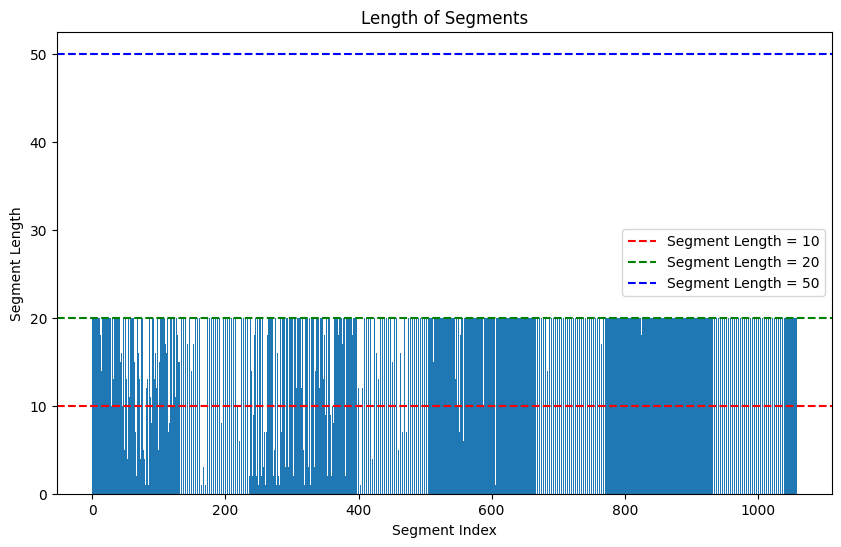

In [6]:
segment_lengths = [len(segment) for segment in dataset["filtered_segment"]]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(segment_lengths)), segment_lengths)
plt.xlabel("Segment Index")
plt.ylabel("Segment Length")
plt.title("Length of Segments")

plt.axhline(y=10, color='r', linestyle='--', label='Segment Length = 10')
plt.axhline(y=20, color='g', linestyle='--', label='Segment Length = 20')
plt.axhline(y=50, color='b', linestyle='--', label='Segment Length = 50')

# Show legend
plt.legend()
plt.show()

In [7]:
total_syllables = 0

for segment in dataset['filtered_segment']:
    total_syllables += len(segment)

print(total_syllables)

19086


In [8]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
from transformers import Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor(
    feature_size=1,
    sampling_rate=16000,
    padding_value=0.0,
    do_normalize=True,
    return_attention_mask=False
)

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [11]:
from transformers import Wav2Vec2Model

model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
audio_data = dataset["filtered_segment"][0][0]
print(audio_data)

[0.00915527 0.00747681 0.00805664 ... 0.06759644 0.07061768 0.04684448]


In [13]:
import torch

with torch.no_grad():
    inputs = feature_extractor(audio_data, return_tensors="pt", sampling_rate=16000)
    outputs = model(**inputs)

print(outputs.extract_features)

tensor([[[ 0.2411, -0.0938, -0.0254,  ..., -0.0327,  0.0084, -0.5987],
         [ 0.0864,  0.1780,  0.1696,  ...,  0.0942, -0.5050, -0.4996],
         [ 0.3378, -0.0247, -0.1607,  ...,  0.1222, -0.3276, -0.2639],
         ...,
         [ 0.1730, -0.0850, -0.0106,  ...,  0.5729, -0.1858,  0.0415],
         [ 0.4007,  0.2178,  0.0638,  ...,  0.4580, -0.4451,  0.1332],
         [-0.1434,  0.0954,  0.1858,  ..., -0.3795, -0.3878, -0.0373]]])


In [14]:
extract_features = outputs.extract_features
avg_pooled_features = torch.mean(extract_features, dim=-1)
print(avg_pooled_features)
print(avg_pooled_features[0])

tensor([[0.0226, 0.0245, 0.0254, 0.0252, 0.0256, 0.0244, 0.0260]])
tensor([0.0226, 0.0245, 0.0254, 0.0252, 0.0256, 0.0244, 0.0260])


In [15]:
all_extracted_features = []
count = 0

with torch.no_grad():
    for index, row in dataset.iterrows():

        segment_list = row['filtered_segment']
        
        item_features = []


        for segment in segment_list:

            print(count)
            count+= 1

            inputs = feature_extractor(segment, return_tensors="pt", sampling_rate=16000)
            outputs = model(**inputs)
            
            features = outputs.extract_features
            
            avg_pooled_features = torch.mean(features, dim=-1)
            item_features.append(avg_pooled_features)
        
        all_extracted_features.append(item_features)

dataset['extracted_features'] = all_extracted_features

print(dataset)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
dataset.to_pickle("embedded_dataset.pkl")

In [17]:
dataset_pk = pd.read_pickle("embedded_dataset.pkl")

proper_tensor_dataset = []

for tensor_list in dataset_pk['extracted_features'].to_list():
    proper_tensor_list = []
    for tensor in tensor_list:
        proper_tensor_list.append(tensor[0].numpy())
    proper_tensor_dataset.append(proper_tensor_list)


print(proper_tensor_dataset[0])

dataset_pk['proper_features'] = proper_tensor_dataset

[array([0.02262909, 0.02447669, 0.02541383, 0.02516715, 0.02560124,
       0.02440733, 0.02596398], dtype=float32), array([0.02331423, 0.02249115, 0.0247385 , 0.02404767, 0.02563831,
       0.02687663, 0.02546103], dtype=float32), array([0.02545808, 0.02653703, 0.02616628, 0.02482448, 0.02505713,
       0.02510545], dtype=float32), array([0.02456288, 0.0246113 , 0.02619606, 0.02519104, 0.02539301,
       0.02535371, 0.02317958, 0.02588508, 0.0237604 , 0.02460524],
      dtype=float32), array([0.02843907, 0.02784826, 0.02895996, 0.02466902, 0.02335224,
       0.02479201, 0.02544632, 0.02531277, 0.02134475], dtype=float32), array([0.0237632 , 0.02445745, 0.02523795, 0.02670899, 0.02753546,
       0.02759678, 0.02580925, 0.02432208, 0.03027227, 0.02479574,
       0.02643431, 0.02344079, 0.02441616, 0.02386236], dtype=float32), array([0.02521525, 0.02549801, 0.02683614, 0.0239142 , 0.02618536,
       0.02622346, 0.02753378, 0.02586505, 0.0271056 , 0.02843002,
       0.02533721, 0.02722964,

In [18]:
def should_remove(item):

    for tensor in item:
        if len(tensor) > 1000:
            return True
    
    return False


filtered_dataset = dataset_pk[~dataset_pk["proper_features"].apply(should_remove)]

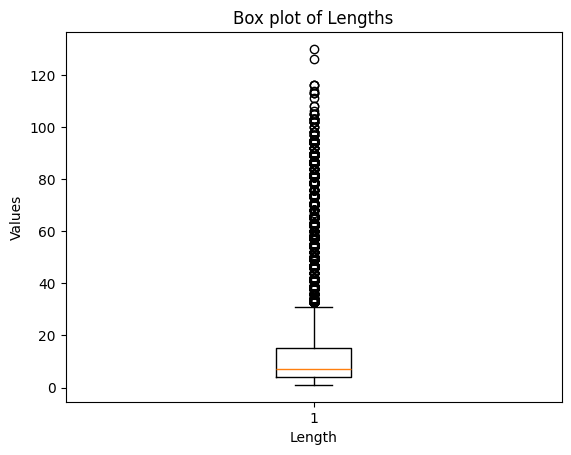

In [19]:
import matplotlib.pyplot as plt

len_array = []

for tensor_list in filtered_dataset['proper_features']:
    for tensor in tensor_list:
        len_array.append(len(tensor))

plt.boxplot(len_array)
plt.xlabel('Length')
plt.ylabel('Values')
plt.title('Box plot of Lengths')
plt.show()

In [20]:
def should_remove(item):

    for tensor in item:
        if len(tensor) > 100:
            return True
    
    return False


filtered_dataset = dataset_pk[~dataset_pk["proper_features"].apply(should_remove)]

In [21]:
print(len(dataset_pk))
print(len(filtered_dataset))

1059
1030


In [22]:
import numpy as np

max_tensor_length = 100
max_len = 20

padded_tensor_dataset = []

for tensor_list in filtered_dataset['proper_features']:
    padded_tensor_list = []
    for tensor in tensor_list:
        current_length = tensor.shape[0]
        padded_tensor = np.zeros((max_tensor_length,),dtype=tensor.dtype)
        padded_tensor[:current_length] = tensor
        padded_tensor_list.append(padded_tensor)

    if len(padded_tensor_list) < max_len:
        tensor = padded_tensor_list[0]
        for i in range(max_len - len(padded_tensor_list)):
            padded_tensor = np.zeros((max_tensor_length,) + tensor.shape[1:],dtype=tensor.dtype)
            padded_tensor_list.append(padded_tensor)
    
    padded_tensor_dataset.append(np.array(padded_tensor_list))

print(padded_tensor_dataset)

[array([[0.02262909, 0.02447669, 0.02541383, ..., 0.        , 0.        ,
        0.        ],
       [0.02331423, 0.02249115, 0.0247385 , ..., 0.        , 0.        ,
        0.        ],
       [0.02545808, 0.02653703, 0.02616628, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02197777, 0.02153206, 0.02248763, ..., 0.        , 0.        ,
        0.        ],
       [0.02702291, 0.02623843, 0.02573387, ..., 0.        , 0.        ,
        0.        ],
       [0.02550675, 0.02315764, 0.02672605, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02541327, 0.02389549, 0.02450692, ..., 0.        , 0.        ,
        0.        ],
       [0.02374095, 0.02536062, 0.02401734, ..., 0.        , 0.        ,
        0.        ],
       [0.02673406, 0.02413933, 0.02586368, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02620004, 0.02592876, 0.0266249 , ..., 0.        , 0.        ,
        0.        ],
       [0.02378797

In [23]:
filtered_dataset['padded_features'] = padded_tensor_dataset

C:\Users\aksha\AppData\Local\Temp\ipykernel_29448\278673644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['padded_features'] = padded_tensor_dataset


In [24]:
label_map = {'English': 0, 'Hindi': 1, 'CodeMixed': 2}
filtered_dataset['label_numeric'] = filtered_dataset['label'].map(label_map)

C:\Users\aksha\AppData\Local\Temp\ipykernel_29448\655317510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['label_numeric'] = filtered_dataset['label'].map(label_map)


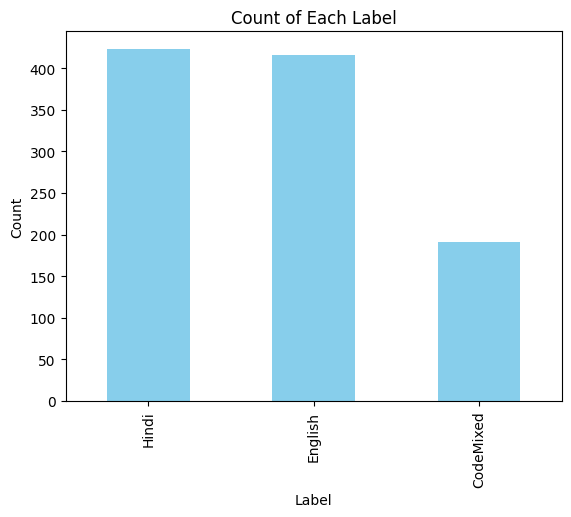

In [25]:
label_counts = filtered_dataset['label'].value_counts()

label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

dataset_random = filtered_dataset.sample(frac=1,random_state=42)

train_df,test_df = train_test_split(dataset_random,test_size=0.2,train_size=0.8)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

Train set size: 824
Test set size: 206


In [27]:
train_df

,segment_list,label,filtered_segment,extracted_features,proper_features,padded_features,label_numeric
0,"[[0.43053564, 0.44258076, 0.43772054, -0.55846...",English,"[[0.43053564, 0.44258076, 0.43772054, -0.55846...","[[[tensor(0.0218), tensor(0.0225), tensor(0.02...","[[0.021840582, 0.02253041, 0.02446703, 0.02348...","[[0.021840582, 0.02253041, 0.02446703, 0.02348...",0
1,"[[0.46250305, 0.45910168, 0.46231923, 0.451693...",English,"[[0.46250305, 0.45910168, 0.46231923, 0.451693...","[[[tensor(0.0260), tensor(0.0257), tensor(0.02...","[[0.025991363, 0.025728112, 0.027809214, 0.024...","[[0.025991363, 0.025728112, 0.027809214, 0.024...",0
2,"[[-0.5827286, -0.5818427, -0.5813193, -0.58080...",English,"[[-0.5827286, -0.5818427, -0.5813193, -0.58080...","[[[tensor(0.0257), tensor(0.0278), tensor(0.02...","[[0.025724204, 0.027827842, 0.025719244, 0.026...","[[0.025724204, 0.027827842, 0.025719244, 0.026...",0
3,"[[0.45763978, 0.45671648, -0.53666604, 0.46371...",English,"[[0.45763978, 0.45671648, -0.53666604, 0.46371...","[[[tensor(0.0227), tensor(0.0234), tensor(0.02...","[[0.022711037, 0.023416812, 0.023501718, 0.023...","[[0.022711037, 0.023416812, 0.023501718, 0.023...",0
4,"[[-0.01473999, 0.027069092, 0.09365845, 0.1837...",Hindi,"[[-0.01473999, 0.027069092, 0.09365845, 0.1837...","[[[tensor(0.0304), tensor(0.0292), tensor(0.02...","[[0.030434242, 0.029188424, 0.025959784, 0.027...","[[0.030434242, 0.029188424, 0.025959784, 0.027...",1
...,...,...,...,...,...,...,...
819,"[[0.43538502, 0.4353853, 0.43538556, 0.4353858...",English,"[[0.43538502, 0.4353853, 0.43538556, 0.4353858...","[[[tensor(0.0301), tensor(0.0288), tensor(0.02...","[[0.030096915, 0.0288452, 0.028746536, 0.02300...","[[0.030096915, 0.0288452, 0.028746536, 0.02300...",0
820,"[[-0.5538004, -0.5689736, 0.45095715, 0.454627...",English,"[[-0.5538004, -0.5689736, 0.45095715, 0.454627...","[[[tensor(0.0251), tensor(0.0268)]], [[tensor(...","[[0.025101785, 0.0267554], [0.025685502, 0.026...","[[0.025101785, 0.0267554, 0.0, 0.0, 0.0, 0.0, ...",0
821,"[[0.0059814453, 0.0026855469, 0.0065307617, 0....",CodeMixed,"[[0.0059814453, 0.0026855469, 0.0065307617, 0....","[[[tensor(0.0241), tensor(0.0262), tensor(0.02...","[[0.024074709, 0.026247032, 0.025737474, 0.026...","[[0.024074709, 0.026247032, 0.025737474, 0.026...",2
822,"[[-0.5324934, -0.5312205, -0.53117615, -0.5311...",English,"[[-0.5324934, -0.5312205, -0.53117615, -0.5311...","[[[tensor(0.0271), tensor(0.0271), tensor(0.02...","[[0.02709552, 0.027143136, 0.027248723, 0.0288...","[[0.02709552, 0.027143136, 0.027248723, 0.0288...",0


In [28]:
x_train = np.array(train_df['padded_features'].to_list())
print(x_train.shape)
y_train = np.array(train_df['label_numeric'].to_list())
print(y_train.shape)

num_classes = len(np.unique(y_train))
print(num_classes)

(824, 20, 100)
(824,)
3


In [29]:
x_test = np.array(test_df['padded_features'].to_list())
y_test = np.array(test_df['label_numeric'].to_list())

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units = 128,return_sequences = True,input_shape=(20,100)))
model.add(LSTM(units=256,return_sequences=True))
model.add(LSTM(units=256,return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=num_classes,activation = 'softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.summary()

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 128)        │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,234,307 (4.71 MB)

 Trainable params: 1,234,307 (4.71 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

history = model.fit(x_train, y_train, class_weight = class_weights, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_model.keras")

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5207 - loss: 1.0196
Epoch 1: val_accuracy improved from -inf to 0.85455, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5276 - loss: 1.0153 - val_accuracy: 0.8545 - val_loss: 0.5926
Epoch 2/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8237 - loss: 0.6660
Epoch 2: val_accuracy did not improve from 0.85455
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8207 - loss: 0.6629 - val_accuracy: 0.5515 - val_loss: 0.6610
Epoch 3/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7745 - loss: 0.6049
Epoch 3: val_accuracy improved from 0.85455 to 0.87879, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7820 - loss: 0.6005 - val_accuracy: 0.8788 - val_loss: 0.3567
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8775 - loss: 0.4459
Epoch 4: val_accuracy did not improve from 0.87879
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
LSTM
Accuracy: 0.912621359223301
Precision: 0.9072743900883345
Recall: 0.912621359223301
F1 Score: 0.9073441294193492


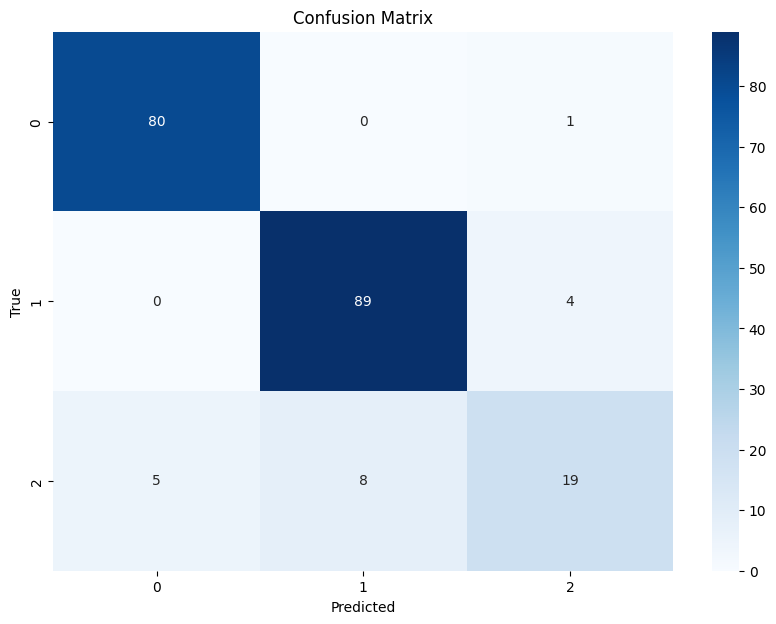

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("LSTM")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from tensorflow.keras.layers import GRU

model = Sequential()

model.add(GRU(units=128, return_sequences=True, input_shape=(20, 100)))
model.add(GRU(units=256, return_sequences=True))
model.add(GRU(units=256, return_sequences=True))
model.add(GRU(units=128))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("best_gru_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

history = model.fit(x_train, y_train, class_weight = class_weights, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_gru_model.keras")

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 20, 128)        │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 20, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 20, 256)        │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 128)            │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 928,131 (3.54 MB)

 Trainable params: 928,131 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5037 - loss: 0.9748
Epoch 1: val_accuracy improved from -inf to 0.90303, saving model to best_gru_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5102 - loss: 0.9693 - val_accuracy: 0.9030 - val_loss: 0.4899
Epoch 2/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8590 - loss: 0.5418
Epoch 2: val_accuracy did not improve from 0.90303
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8569 - loss: 0.5435 - val_accuracy: 0.8848 - val_loss: 0.3213
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8581 - loss: 0.4533
Epoch 3: val_accuracy did not improve from 0.90303
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8575 - loss: 0.4533 - val_accuracy: 0.8364 - val_loss: 0.4048
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8019 - loss: 0.4705
Epoch 4: val_accuracy did not improve from 0.90303
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8028 - loss: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
GRU
Accuracy: 0.912621359223301
Precision: 0.9086927071573718
Recall: 0.912621359223301
F1 Score: 0.9040469830961889


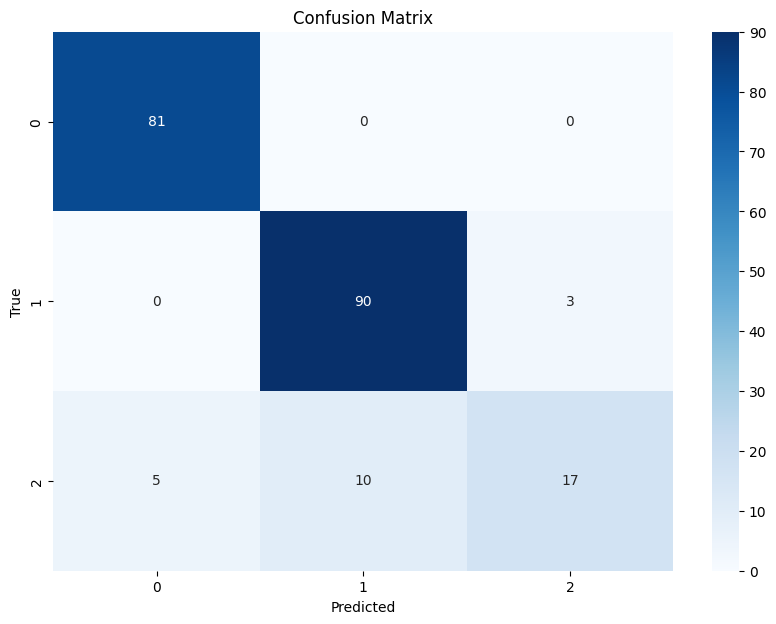

In [34]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("GRU")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()

model.add(SimpleRNN(units=128, return_sequences=True, input_shape=(20, 100)))
model.add(SimpleRNN(units=256, return_sequences=True))
model.add(SimpleRNN(units=256, return_sequences=True))
model.add(SimpleRNN(units=128))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("best_rnn_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

history = model.fit(x_train, y_train,class_weight = class_weights, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_rnn_model.keras")

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20, 128)        │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 20, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 20, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,867 (1.18 MB)

 Trainable params: 308,867 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4495 - loss: 1.3841
Epoch 1: val_accuracy improved from -inf to 0.71515, saving model to best_rnn_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4899 - loss: 1.2745 - val_accuracy: 0.7152 - val_loss: 0.7628
Epoch 2/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7465 - loss: 0.8421
Epoch 2: val_accuracy improved from 0.71515 to 0.74545, saving model to best_rnn_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7513 - loss: 0.8274 - val_accuracy: 0.7455 - val_loss: 0.5883
Epoch 3/50
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8217 - loss: 0.4817
Epoch 3: val_accuracy improved from 0.74545 to 0.86667, saving model to best_rnn_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8239 - loss: 0.4849 - val_accuracy: 0.8667 - val_loss: 0.3460
Epoch 4/50
17/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8172 - loss: 0.5024
Epoch 4: val_accuracy improved from 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Simple RNN
Accuracy: 0.9029126213592233
Precision: 0.8968952400097704
Recall: 0.9029126213592233
F1 Score: 0.8984489053041368


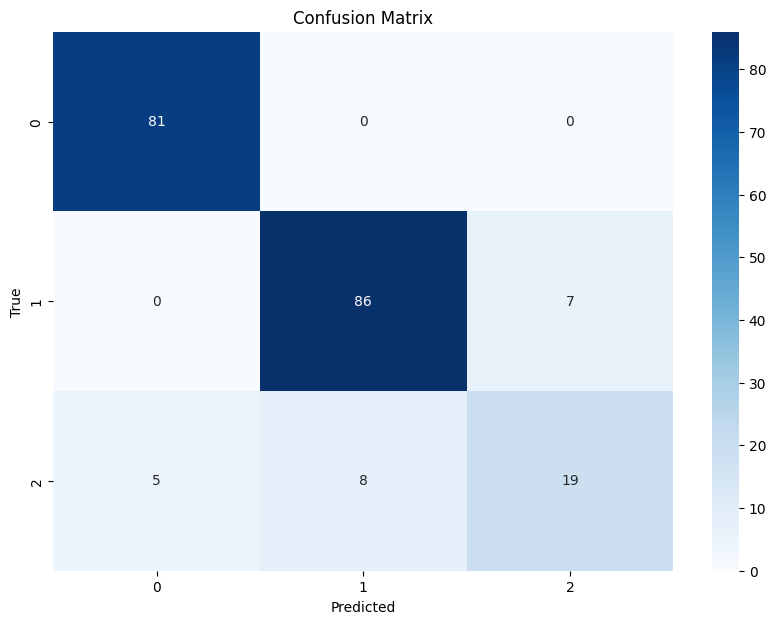

In [36]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("Simple RNN")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()

model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(20, 100)))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("best_bilstm_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

history = model.fit(x_train, y_train,class_weight = class_weights, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_bilstm_model.keras")

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 20, 256)        │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 20, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 20, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,517,187 (13.42 MB)

 Trainable params: 3,517,187 (13.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4808 - loss: 1.0224
Epoch 1: val_accuracy improved from -inf to 0.84848, saving model to best_bilstm_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.4960 - loss: 1.0042 - val_accuracy: 0.8485 - val_loss: 0.3754
Epoch 2/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8356 - loss: 0.5433
Epoch 2: val_accuracy improved from 0.84848 to 0.89091, saving model to best_bilstm_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8369 - loss: 0.5407 - val_accuracy: 0.8909 - val_loss: 0.2467
Epoch 3/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8483 - loss: 0.4571
Epoch 3: val_accuracy did not improve from 0.89091
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8483 - loss: 0.4545 - val_accuracy: 0.8909 - val_loss: 0.2864
Epoch 4/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8641 - loss: 0.3853
Epoch 4: val_accuracy did not improve from 0.89091
21/21 ━━━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Bidirectional LSTM
Accuracy: 0.9029126213592233
Precision: 0.8977243802704695
Recall: 0.9029126213592233
F1 Score: 0.8911443460879497


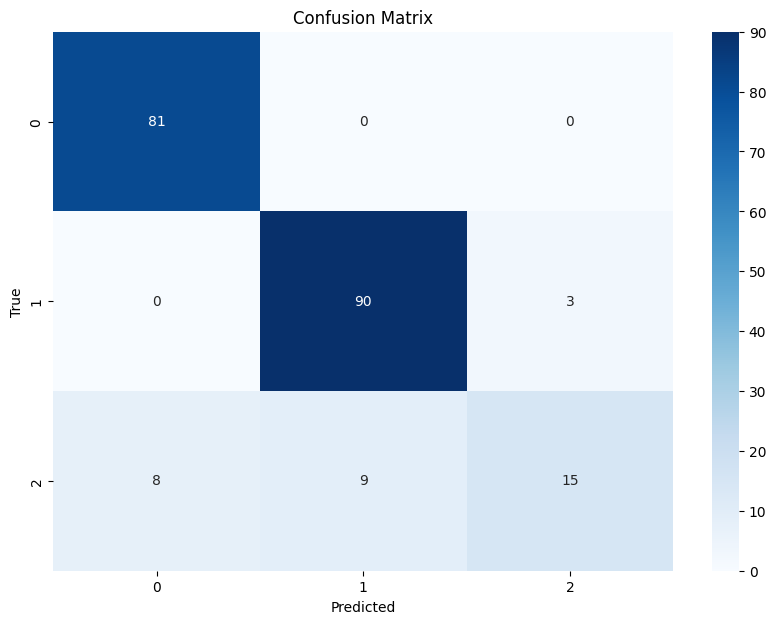

In [38]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("Bidirectional LSTM")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()